<a href="https://colab.research.google.com/github/Muhyeok/HUFS/blob/main/201604045_%EA%B9%80%EB%AC%B4%ED%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,905 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144793 files and d

In [1]:
import pandas as pd

In [83]:
data=pd.read_csv('/content/gdrive/My Drive/201604045 김무혁_데이터스키마.csv', encoding='cp949', engine='python')

In [85]:
data.head()

,no,nickname,text,score,like,time,hotel,grade,stay
0,0,Sseung,친구들과 계획없이 다녀 온 여행~ 도착했을때 환영합니다~하며 웃으며 차에서 짐을 꺼...,5,0.0,2020.09,롯데 호텔 제주,5.0,2020.04
1,1,ramenpop,9월 초 아직 뜨거운 날씨에 다녀왔습니다. 주로 수영장에서 시간을 보냈는데 물이 차...,4,140.0,2020.09,롯데 호텔 제주,5.0,2020.09
2,2,Sue park,조금은 추웠던 4월에 롯데 호텔 제주를 방문 하고 왔습니다 롯데호텔 세 번째 방문인...,5,0.0,2020.04,롯데 호텔 제주,5.0,2020.04
3,3,lifeistravel2015,윙쪽 방을 주었는데 로비에서 너무 멀었다. 규모있는 오성급호텔이고 비수기라 투숙율이...,3,83.0,2020.09,롯데 호텔 제주,5.0,2020.09
4,4,yjko,벌써 몇개월 전이네요 가을 냄새 솔솔 풍기는 요즘 다시 또 가고 싶네요 너무 좋았거...,5,0.0,2020.09,롯데 호텔 제주,5.0,2020.06


In [86]:
data = data[['text','score']]

In [87]:
data.head()

,text,score
0,친구들과 계획없이 다녀 온 여행~ 도착했을때 환영합니다~하며 웃으며 차에서 짐을 꺼...,5
1,9월 초 아직 뜨거운 날씨에 다녀왔습니다. 주로 수영장에서 시간을 보냈는데 물이 차...,4
2,조금은 추웠던 4월에 롯데 호텔 제주를 방문 하고 왔습니다 롯데호텔 세 번째 방문인...,5
3,윙쪽 방을 주었는데 로비에서 너무 멀었다. 규모있는 오성급호텔이고 비수기라 투숙율이...,3
4,벌써 몇개월 전이네요 가을 냄새 솔솔 풍기는 요즘 다시 또 가고 싶네요 너무 좋았거...,5


In [88]:
data.head()

,text,score
0,친구들과 계획없이 다녀 온 여행~ 도착했을때 환영합니다~하며 웃으며 차에서 짐을 꺼...,5
1,9월 초 아직 뜨거운 날씨에 다녀왔습니다. 주로 수영장에서 시간을 보냈는데 물이 차...,4
2,조금은 추웠던 4월에 롯데 호텔 제주를 방문 하고 왔습니다 롯데호텔 세 번째 방문인...,5
3,윙쪽 방을 주었는데 로비에서 너무 멀었다. 규모있는 오성급호텔이고 비수기라 투숙율이...,3
4,벌써 몇개월 전이네요 가을 냄새 솔솔 풍기는 요즘 다시 또 가고 싶네요 너무 좋았거...,5


In [89]:
!pip install konlpy

In [90]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from itertools import chain
import pickle
import seaborn as sns
import numpy as np

In [91]:
high_rating = data.drop(data.index[np.where((data['score'] <= 3))])
low_rating = data.drop(data.index[np.where((data['score'] >= 4))])

In [92]:
high_rating.shape, low_rating.shape

((1728, 2), (286, 2))

In [93]:
data_noun_high = []
num=0
nlp = Okt()

In [94]:
for doc in high_rating.text:
    if num % 100 == 0:
        print('{}번 완료'.format(num))
    data_noun_high.append(nlp.nouns(doc))
    num+=1

0번 완료
100번 완료
200번 완료
300번 완료
400번 완료
500번 완료
600번 완료
700번 완료
800번 완료
900번 완료
1000번 완료
1100번 완료
1200번 완료
1300번 완료
1400번 완료
1500번 완료
1600번 완료
1700번 완료


In [95]:
data_noun_low = []
num=0
nlp = Okt()

In [96]:
for doc in low_rating.text:
    if num % 100 == 0:
        print('{}번 완료'.format(num))
    data_noun_low.append(nlp.nouns(doc))
    num+=1

0번 완료
100번 완료
200번 완료


In [97]:
def replaceTxt(func, old, new):
    newList = []
    for doc in func:
        newTxt = []
        for w in doc:
            newTxt.append(w.replace(old, new))
        newList.append(newTxt)
    return newList

def joinTxt(func):
    newTxt = []
    for doc in func:
        newTxt.append(" ".join(doc))
    return newTxt

In [98]:
data_noun_high=replaceTxt(data_noun_high, '호텔', '')
data_noun_high=replaceTxt(data_noun_high, '직원', '')
data_noun_low=replaceTxt(data_noun_low, '호텔', '')
data_noun_low=replaceTxt(data_noun_low, '직원', '')

In [99]:
data_join_high = joinTxt(data_noun_high)
data_join_low = joinTxt(data_noun_low)

In [100]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import font_manager
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle

In [101]:
cv=CountVectorizer(max_features=330000)

In [102]:
dtm_high = cv.fit_transform(data_join_high)

In [103]:
words=cv.get_feature_names()

In [104]:
words

['가게',
 '가격',
 '가구',
 '가기',
 '가까이',
 '가끔',
 '가나',
 '가능',
 '가능성',
 '가다가',
 '가도',
 '가드',
 '가득',
 '가든',
 '가라',
 '가량',
 '가로',
 '가림',
 '가면',
 '가방',
 '가보',
 '가성',
 '가세',
 '가수',
 '가스',
 '가슴',
 '가습기',
 '가시',
 '가야',
 '가요',
 '가우',
 '가운',
 '가운데',
 '가을',
 '가이드',
 '가입',
 '가장',
 '가장자리',
 '가전',
 '가정식',
 '가족',
 '가죽',
 '가지',
 '가짐',
 '가짓수',
 '가치',
 '가파르',
 '가파른',
 '각각',
 '각광',
 '각도',
 '각자',
 '각종',
 '간격',
 '간다',
 '간만',
 '간소',
 '간식',
 '간의',
 '간이',
 '간전',
 '간접',
 '간호사',
 '간혹',
 '갈곳도',
 '갈대',
 '갈비',
 '갈수',
 '갈치',
 '감귤',
 '감기',
 '감독',
 '감동',
 '감명',
 '감사',
 '감상',
 '감성',
 '감시',
 '감안',
 '감점',
 '감정',
 '감지',
 '감탄',
 '감흥',
 '감히',
 '갑임',
 '갑자기',
 '갑작스레',
 '값어치',
 '강력',
 '강아지',
 '강점',
 '강정',
 '강추',
 '강츄입니',
 '개관',
 '개국',
 '개발',
 '개방',
 '개별',
 '개봉',
 '개선',
 '개수대',
 '개월',
 '개월딸',
 '개인',
 '개장',
 '개정',
 '개취',
 '객수',
 '객실',
 '갯벌',
 '갯수',
 '갹실',
 '거기',
 '거꾸로',
 '거나',
 '거도',
 '거듭',
 '거려',
 '거론',
 '거르세',
 '거리',
 '거뭇거뭇',
 '거부',
 '거실',
 '거여',
 '거울',
 '거의',
 '거짓말',
 '걱정',
 '건강',
 '건너',
 '건너편',
 '건데',
 '건물',
 '건승',
 '건의',
 '건조'

In [105]:
count_high_mat=dtm_high.sum(axis=0)
count_high_mat

matrix([[ 16, 233,   5, ...,   1,   1,   1]], dtype=int64)

In [109]:
count_high=np.squeeze(np.asarray(count_high_mat))
word_count_high=list(zip(words,count_high))
word_count_high

[('가게', 16),
 ('가격', 233),
 ('가구', 5),
 ('가기', 37),
 ('가까이', 16),
 ('가끔', 10),
 ('가나', 1),
 ('가능', 10),
 ('가능성', 1),
 ('가다가', 1),
 ('가도', 6),
 ('가드', 28),
 ('가득', 2),
 ('가든', 11),
 ('가라', 2),
 ('가량', 2),
 ('가로', 1),
 ('가림', 1),
 ('가면', 16),
 ('가방', 2),
 ('가보', 1),
 ('가성', 115),
 ('가세', 4),
 ('가수', 1),
 ('가스', 1),
 ('가슴', 2),
 ('가습기', 18),
 ('가시', 4),
 ('가야', 5),
 ('가요', 16),
 ('가우', 1),
 ('가운', 9),
 ('가운데', 5),
 ('가을', 8),
 ('가이드', 3),
 ('가입', 3),
 ('가장', 54),
 ('가장자리', 1),
 ('가전', 1),
 ('가정식', 1),
 ('가족', 365),
 ('가죽', 1),
 ('가지', 33),
 ('가짐', 1),
 ('가짓수', 9),
 ('가치', 1),
 ('가파르', 1),
 ('가파른', 1),
 ('각각', 3),
 ('각광', 1),
 ('각도', 1),
 ('각자', 5),
 ('각종', 12),
 ('간격', 5),
 ('간다', 9),
 ('간만', 5),
 ('간소', 1),
 ('간식', 3),
 ('간의', 1),
 ('간이', 4),
 ('간전', 2),
 ('간접', 1),
 ('간호사', 1),
 ('간혹', 3),
 ('갈곳도', 1),
 ('갈대', 1),
 ('갈비', 2),
 ('갈수', 11),
 ('갈치', 4),
 ('감귤', 6),
 ('감기', 3),
 ('감독', 1),
 ('감동', 59),
 ('감명', 4),
 ('감사', 26),
 ('감상', 5),
 ('감성', 1),
 ('감시', 1),
 ('감안', 6),
 ('감점', 1),
 ('감

In [110]:
word_count_high=sorted(word_count_high, key=lambda x:x[1], reverse=True)

In [111]:
word_count_high

[('이용', 564),
 ('시설', 536),
 ('여행', 520),
 ('수영장', 502),
 ('아이', 402),
 ('객실', 395),
 ('방문', 380),
 ('가족', 365),
 ('다음', 357),
 ('조식', 351),
 ('제주', 333),
 ('정말', 278),
 ('제주도', 270),
 ('위치', 269),
 ('서비스', 253),
 ('가격', 233),
 ('공항', 227),
 ('신화', 220),
 ('체크', 207),
 ('최고', 201),
 ('숙소', 196),
 ('리조트', 187),
 ('바다', 185),
 ('다시', 183),
 ('매우', 183),
 ('시간', 180),
 ('조금', 179),
 ('컨디션', 175),
 ('아주', 174),
 ('월드', 172),
 ('침대', 171),
 ('주변', 169),
 ('생각', 166),
 ('추천', 163),
 ('메리어트', 161),
 ('거리', 158),
 ('모두', 145),
 ('예약', 145),
 ('정도', 140),
 ('바로', 136),
 ('롯데', 132),
 ('투숙', 129),
 ('근처', 127),
 ('기분', 127),
 ('다만', 126),
 ('숙박', 117),
 ('가성', 115),
 ('느낌', 106),
 ('아기', 106),
 ('전망', 104),
 ('선택', 103),
 ('다른', 102),
 ('식당', 99),
 ('처음', 97),
 ('이번', 95),
 ('무료', 93),
 ('아침', 93),
 ('때문', 91),
 ('주차', 91),
 ('저녁', 90),
 ('편의점', 87),
 ('모든', 85),
 ('상태', 83),
 ('음식', 83),
 ('무엇', 79),
 ('대비', 78),
 ('오션', 78),
 ('청소', 77),
 ('친구', 77),
 ('부대', 76),
 ('사람', 76),
 ('응대', 76),
 ('중

In [112]:
plot_high = pd.DataFrame(word_count_high[:30], columns = ['noun','times'])

In [113]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['figure.figsize'] = (10, 7)

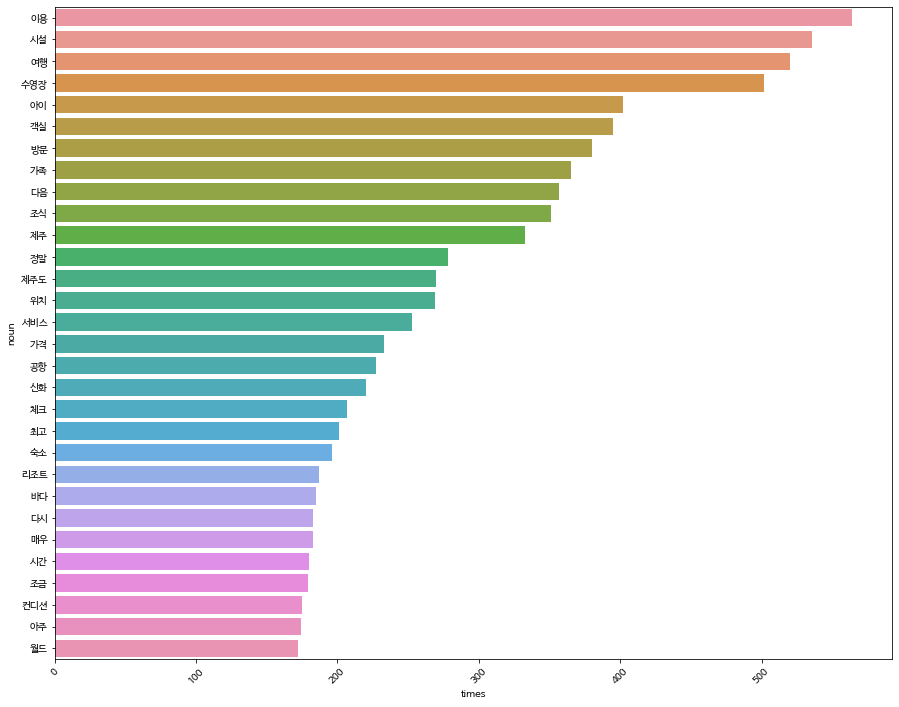

In [114]:
plt.figure(figsize=(15,12))
plt.xticks(rotation = 45)
sns.barplot(x="times", y="noun", data=plot_high)

In [115]:
wc=WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)

In [116]:
cloud=wc.generate_from_frequencies(dict(word_count_high))

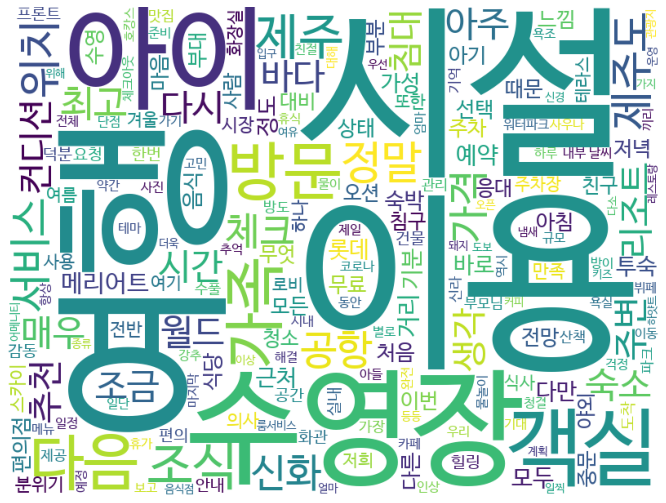

In [117]:
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [118]:
dtm_low = cv.fit_transform(data_join_low)

In [119]:
words=cv.get_feature_names()

In [120]:
words

['가게',
 '가격',
 '가구',
 '가기',
 '가까이',
 '가끔',
 '가능',
 '가도',
 '가동',
 '가드',
 '가득',
 '가든',
 '가량',
 '가려움',
 '가로',
 '가루',
 '가면',
 '가방',
 '가보',
 '가성',
 '가세',
 '가스',
 '가습기',
 '가시',
 '가신',
 '가야',
 '가요',
 '가운',
 '가운데',
 '가장',
 '가족',
 '가지',
 '가짓수',
 '가차',
 '가치',
 '가타',
 '각각',
 '각자',
 '각종',
 '간다',
 '간만',
 '간식',
 '간의',
 '간이',
 '간주',
 '간판',
 '간혹',
 '갈색',
 '갈치',
 '감기',
 '감동',
 '감사',
 '감상',
 '감색',
 '감안',
 '감정',
 '감탄',
 '값어치',
 '강아지',
 '강압',
 '강점',
 '강제',
 '개무시',
 '개별',
 '개선',
 '개설',
 '개월',
 '개인',
 '개판',
 '객실',
 '갤러리',
 '갯수',
 '거기',
 '거나',
 '거리',
 '거림',
 '거뭇',
 '거미',
 '거미줄',
 '거부',
 '거실',
 '거울',
 '거의',
 '거절',
 '거지',
 '거참',
 '걱정',
 '건가',
 '건강',
 '건너편',
 '건데',
 '건물',
 '건아',
 '걷기',
 '검사',
 '검색',
 '겉보기',
 '게다가',
 '게스트',
 '게스트하우스',
 '게재',
 '겨냥',
 '겨우',
 '겨울',
 '겨울철',
 '격발',
 '결과',
 '결론',
 '결여',
 '결정',
 '결제',
 '겹살',
 '경관',
 '경보',
 '경영',
 '경영학',
 '경우',
 '경쟁력',
 '경찰',
 '경치',
 '경험',
 '계단',
 '계란후라이',
 '계산서',
 '계속',
 '계심',
 '계약',
 '계획',
 '고개',
 '고객',
 '고객감동',
 '고기',
 '고깃집',
 '고등',
 '고려',
 '고리',
 '고마움',
 '고민',
 '고생'

In [121]:
count_low_mat=dtm_low.sum(axis=0)
count_low_mat

matrix([[ 1, 62,  3, ...,  1,  1,  1]], dtype=int64)

In [122]:
count_low=np.squeeze(np.asarray(count_low_mat))
word_count_low=list(zip(words,count_low))
word_count_low

[('가게', 1),
 ('가격', 62),
 ('가구', 3),
 ('가기', 5),
 ('가까이', 2),
 ('가끔', 2),
 ('가능', 8),
 ('가도', 3),
 ('가동', 5),
 ('가드', 5),
 ('가득', 4),
 ('가든', 1),
 ('가량', 1),
 ('가려움', 1),
 ('가로', 1),
 ('가루', 1),
 ('가면', 3),
 ('가방', 1),
 ('가보', 1),
 ('가성', 15),
 ('가세', 2),
 ('가스', 1),
 ('가습기', 3),
 ('가시', 1),
 ('가신', 2),
 ('가야', 5),
 ('가요', 1),
 ('가운', 3),
 ('가운데', 3),
 ('가장', 10),
 ('가족', 23),
 ('가지', 9),
 ('가짓수', 1),
 ('가차', 1),
 ('가치', 1),
 ('가타', 1),
 ('각각', 1),
 ('각자', 1),
 ('각종', 1),
 ('간다', 1),
 ('간만', 1),
 ('간식', 2),
 ('간의', 1),
 ('간이', 2),
 ('간주', 2),
 ('간판', 1),
 ('간혹', 2),
 ('갈색', 2),
 ('갈치', 1),
 ('감기', 3),
 ('감동', 2),
 ('감사', 1),
 ('감상', 1),
 ('감색', 1),
 ('감안', 1),
 ('감정', 2),
 ('감탄', 1),
 ('값어치', 1),
 ('강아지', 2),
 ('강압', 1),
 ('강점', 1),
 ('강제', 2),
 ('개무시', 1),
 ('개별', 1),
 ('개선', 4),
 ('개설', 1),
 ('개월', 1),
 ('개인', 10),
 ('개판', 1),
 ('객실', 148),
 ('갤러리', 1),
 ('갯수', 1),
 ('거기', 3),
 ('거나', 6),
 ('거리', 21),
 ('거림', 1),
 ('거뭇', 1),
 ('거미', 1),
 ('거미줄', 1),
 ('거부', 1),
 ('거실', 1),
 ('거울', 2)

In [123]:
word_count_low=sorted(word_count_low, key=lambda x:x[1], reverse=True)

In [124]:
word_count_low

[('객실', 148),
 ('이용', 81),
 ('시설', 79),
 ('서비스', 76),
 ('수영장', 64),
 ('냄새', 63),
 ('가격', 62),
 ('매우', 61),
 ('정도', 61),
 ('예약', 55),
 ('위치', 55),
 ('조식', 53),
 ('체크', 51),
 ('정말', 48),
 ('청소', 47),
 ('여행', 45),
 ('침대', 45),
 ('아이', 44),
 ('최악', 41),
 ('다시', 39),
 ('사람', 38),
 ('별로', 37),
 ('생각', 37),
 ('느낌', 36),
 ('상태', 36),
 ('우리', 35),
 ('고객', 33),
 ('그냥', 33),
 ('시간', 33),
 ('다른', 32),
 ('부분', 32),
 ('전화', 32),
 ('투숙', 32),
 ('바다', 30),
 ('소리', 30),
 ('수준', 30),
 ('화장실', 28),
 ('때문', 27),
 ('숙박', 27),
 ('요청', 27),
 ('주차', 27),
 ('전망', 26),
 ('주차장', 26),
 ('처음', 26),
 ('프론트', 26),
 ('관리', 25),
 ('문제', 25),
 ('수건', 25),
 ('욕실', 25),
 ('제공', 25),
 ('방문', 24),
 ('사용', 24),
 ('추천', 24),
 ('가족', 23),
 ('기분', 23),
 ('방음', 23),
 ('소음', 23),
 ('식당', 23),
 ('전반', 23),
 ('숙소', 22),
 ('조금', 22),
 ('하나', 22),
 ('거리', 21),
 ('로비', 21),
 ('확인', 21),
 ('계속', 20),
 ('공항', 20),
 ('바닥', 20),
 ('주변', 20),
 ('컨디션', 20),
 ('대비', 19),
 ('위해', 19),
 ('다만', 18),
 ('전체', 18),
 ('제주도', 18),
 ('지하', 18),
 ('곰

In [125]:
plot_low = pd.DataFrame(word_count_low[:30], columns = ['noun','times'])

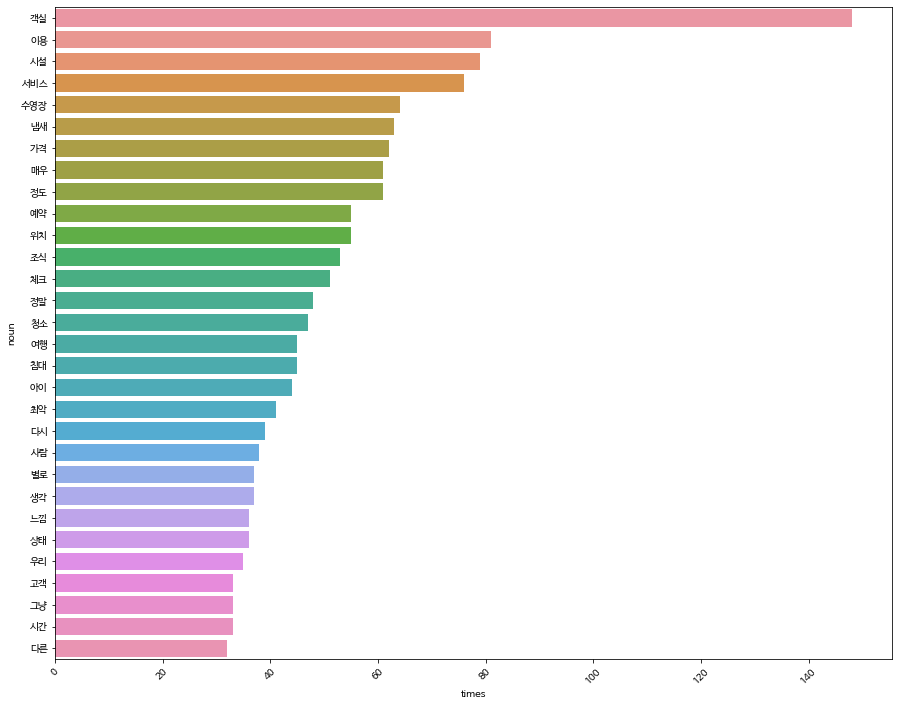

In [126]:
plt.figure(figsize=(15,12))
plt.xticks(rotation = 45)
sns.barplot(x="times", y="noun", data=plot_low)

In [127]:
cloud=wc.generate_from_frequencies(dict(word_count_low))

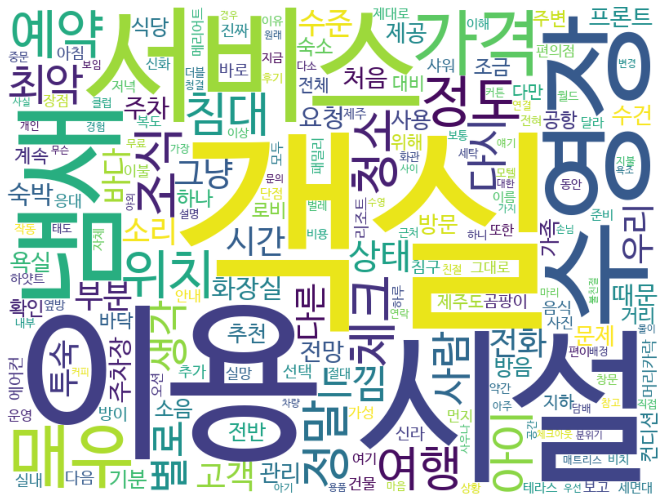

In [128]:
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()